# What makes a video game succeed?
## Planning 2017 Campaing for Online Video Game Store

## Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.



## Data Description

* Name
* Platform
* Year_of_Release
* Genre
* NA_sales (North American sales in USD million)
* EU_sales (sales in Europe in USD million)
* JP_sales (sales in Japan in USD million)
* Other_sales (sales in other countries in USD million)
* Critic_Score (maximum of 100)
* User_Score (maximum of 10)
* Rating (ESRB)

Data for 2016 may be incomplete.

**External data description**

* name: Name of the game
* metacritic: Rating of the game on Metacritic
* released: The date the game was released
* rating: Rating rated by RAWG user
* rating_top: Maximum rating
* platforms: Platforms game was released on. Separated by ||
* genres: Game genres. Separated by ||
* esrb_rating: ESRB ratings


**ESRB Rating Guide:**
* RP = Rating Pending
* EC = Early Childhood
* E = Everyone
* E10+ = Everyone 10+ years old
* T = Teen (13+ years old)
* M = Mature (17+ years Old)
* AO = Adults Only (18+ years old and very explictly, often used for pornographic)


**Platform Dictionary, including manufacturer:**
* Wii - Nintendo Wii
* DS - Nintendo DS
* X360 - XBox 360 (Microsoft)
* PS3 - PlayStation 3 (Sony)
* PS2 - PlayStation 2 (Sony)
* GBA - Nintendo GameBoy Advance
* PS4 - PlayStation 4 (Sony)
* 3DS - Nintendo 3DS
* XB - XBox (Sony), original 
* PC - Personal Computer, PC
* PSP - PlayStation Portable (Sony)
* XOne - XBox One (Sony)
* WiiU - Nintendo WiiU
* NES - Nintendo Entertainment System
* GB - Nintendo GameBoy
* SNES - Nintendo SuperNintendo Entertainment System
* N64 - Nintendo 64
* PS - PlayStation (Sony), original
* 2600 - Atari 2600
* GC - Nintendo GameCube
* GEN - Sega Genesis
* DC - Sega Dreamcast
* PSV - PlayStation Vita (Sony)
* SAT - Sega Saturn
* SCD - Seca CD
* WS - WonderSwan (Bandai)
* NG - Neo Geo (SNK Corporation)
* TG16 -  TurboGrafx-16, also known as PC Engine (NEC Home Electronics)
* 3DO - 3DO Interactive Multiplayer (The 3DO Company)
* GG - Sega Game Gear
* PCFX - PC-FX (NEC Home Electronics and Hudson Soft)


## Table of Contents

Steps
1. [Open the data file and study the general information](#step1)
2. [Prepare the data (Pre-Processing)](#step2)
3. [Analyze the data](#step3)
4. [Create a user profile for each region](#step4)
5. [Test the following hypotheses](#step5)
6. [General Conclusion](#step6)


##  Step 1. Open the data file and study the general information  <a class="anchor" id="step1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import time

In [2]:
# read the date file 
data = pd.read_csv('/datasets/games.csv')
data.head(40)

In [3]:
# check data info
data.info()

- we notice that we have 16715 entries (game) in our data . 
- most of the columns seems to be in the right datatype except for (year_of_release --> int) , (critic_score --> int) and (user_score --> float)
- We will now check every column for possible errors and missing values but first we will change the column names to lowercase and make sure there is no spaces.

In [4]:
# change the column names to lowercase with no spaces
data.columns= data.columns.str.strip().str.lower()
data.head()

In [5]:
data['name'].describe()

In [6]:
data['name'].isna().sum()

the column `name` has 2 missing values and and it looks like some games are repeated we will need to check and see the reasons.

In [7]:
data['platform'].describe()

In [8]:
data['platform'].isna().sum()

we have no missing values in the `platform`column and there are 31 unique platforms in our data with PS2 as the most common platform (2161 entries)

In [9]:
data['year_of_release'].describe()

In [10]:
data['year_of_release'].isna().sum()

- the `year_of_release` are in floats and it should be in integers and there are game starting from 1980 till 2016
- we have 269 missing values wich will ne to be filled or dropped.

In [11]:
data['genre'].describe()

In [12]:
data['genre'].isna().sum()

we have 2 missing values in the `genre`column and there are 12 unique genres in our data with action as the most common genre (3369 entries)

In [13]:
data['na_sales'].describe()

In [14]:
data['na_sales'].isna().sum()

- we have no missing values in `na_sales`
- it looks like we have a high outliers as the mean is higher than the median and max is alot higher than 3rd quartile.
- it seems that more than 25% of our data have 0 values in sales which is wierd and we need to look at it later.

In [15]:
data['eu_sales'].describe()

In [16]:
data['eu_sales'].isna().sum()

- we have no missing values in `eu_sales`
- just like in the `na_sales` it looks like we have a high outliers as the mean is higher than the median and max is alot higher than 3rd quartile.
- just like in the `na_sales` it seems that more than 25% of our data have 0 values in sales which is wierd and we need to look at it later.

In [17]:
data['jp_sales'].describe()

In [18]:
data['jp_sales'].isna().sum()

- we have no missing values in `eu_sales`
- just like in the other regions it looks like we have a high outliers as the mean is higher than the median and max is alot higher than 3rd quartile.
- in Japan it seems that more than 50% of our data have 0 values in sales which is wierd and we need to look at it later.

In [19]:
data['other_sales'].describe()

In [20]:
data['other_sales'].isna().sum()

- we have no missing values in `eu_sales`
- just like in the other regions it looks like we have a high outliers as the mean is higher than the median and max is alot higher than 3rd quartile.
- just like in the other regions it seems that more than 25% of our data have 0 values in sales which is wierd and we need to look at it later.

In [21]:
data.head()

In [22]:
data['critic_score'].describe()

In [23]:
data['critic_score'].isna().sum()

- `critic_score` has alot of missing values (8578).
- the median is lower than the mean which points that there could be low outliers.
- the data is in floats but it could be changed to integers as it represents perecentages (score out of 100)

In [24]:
data['user_score'].describe()

In [25]:
data['user_score'].isna().sum()

- `user_score` also has alot of missing values (6701).
- we notice a  strange value "tbd". we need to check it out later.
- the data is in strings and it needs to be changes to floats as it is (score out of 10) with decimals but this should be done after analyzing the weird "tbd" value

In [26]:
data['rating'].describe()

In [27]:
data['rating'].isna().sum()

In [28]:
data['rating'].value_counts()

- `rating` also has alot of missing values (6766).
- we have 7 different ratings and the 8th is the nan from the missing values..
- only 6 ratings are included in the ESRB rating guide so we will need to check the last unknown rating

In [29]:
data.head()

### Conclusion and Notes:

The data looks self-explanatory but it needs some cleaning to be ready for analyzing and here are the next steps we need to follow:

1. change strings to lower case 
2. change data to the right type when possible:
  - `year_of_release` and `critic_score` --> int 
  - `user_score` --> float
3. check the missing values and handle them with either dropping them or filling if possible
4. check the weird values in the some columns like "tbd" in `user_score`
5. check the wierd 0 values in sales

 ## Step 2. Prepare the data (Pre-Processing) <a class="anchor" id="step2"></a>

we will start with the `name`column.

In [30]:
# save the data length for later use
original_data_length = len(data)
original_data_length

In [31]:
# find the missing values and check them
data.loc[data['name'].isna()]

In [32]:
# percentage of missing values in name
print('percentage of missing values in name: {:.2%}'.format(len(data.loc[data['name'].isna()]) / original_data_length))

we have less than 0.01% which is very small and which almost no data available to fill the missing values we will opt to drop them particularly that they are the same rows with missing values in `genre `.

In [33]:
# droping missing values in name
data.dropna(subset =['name'], inplace = True)

In [34]:
data['name'].isna().sum()

In [35]:
# changing the names to lowercase
data['name'] = data['name'].str.lower()

In [36]:
data['name'].describe()

In [37]:
# check the repeated names ( for example: need for speed: most wanted)
data.loc[data['name'] == 'need for speed: most wanted']

- it looks the name is the smae but with different platforms or release date so it should be safe to leave them as they represent different entries. 
- we can notice that 'need for speed: most wanted' on x360 and on PC both are repeated but in different years (2005 and 2012) in this case it is most likely that they represent a remaster of the game and it is correct to consider them as different entries.
- now that `name`is clean lets check the next column `platform`.

In [38]:
# check content and values of Platform
data['platform'].describe()

In [39]:
data['platform'].value_counts()

In [40]:
# change strings to lower case
data['platform'] = data['platform'].str.lower()
data['platform'].describe()

- we have around 31 diffenrerent platforms with some which have only a few games in our data. these could be isolated during anlysis. 
- we have changed the strings to lower case to make sure there are no duplicates with different cases and the results were the same as before.
- lets chack the `year_of_release`column

In [41]:
data['year_of_release'].isna().sum()

In [42]:
data.loc[data['year_of_release'].isna()].head()

In [43]:
data.loc[data['name'] == 'madden nfl 2004']

- we have around 269 missing values in `year_of_release`which we will try to fill. 
- as we noticed before some of the games are repeated but with different platforms so we can take the release date from other entries with the same name. ( we noticed that the release date can differ between platforms but still it is not that high of  perecntage so we will consider it safe to depend on other platforms to determine the missing release year) 
- we may not be able to fill every entry using this way as some of the game are only available on 1 platform and because these are public informationso we will use an external dataset (from 'Metacritic') toi fill what we can from the rest.

In [44]:
# read external data
from io import BytesIO
import requests
spreadsheet_id = '1uIYvjshBmtOdR9oZipxd1mNocVoY5Ei1g_HOL8hqnuA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
ext_data = pd.read_csv(BytesIO(r.content))
ext_data.head()

In [45]:
ext_data.info()

from this dataset we will need the following columns (name, metacritic, released, rating and esrb_rating) 
- first we will convert the column names to lower case with no spaces.
- we should change the names so they match in both datasets
- we will keep changing and preparing as things are needed later on.

In [46]:
# change column names
ext_data.columns= ext_data.columns.str.strip().str.lower()
ext_data.head()

In [47]:
# change values in name to lowercase and droping thge missing values 
ext_data['name'] = ext_data['name'].str.lower()
ext_data.dropna(subset =['name'], inplace = True)
ext_data.head()

In [48]:
# lets compare the how many name overlap between both datasets
# overlaping games 
overlap = set(data['name']).intersection(set(ext_data['name']))
len(overlap)

as known some of the games are series with multiple entries/games released so it is common for games to be named "name + number" 
and the number could also be written in roman numerals so to avoid differences caused by the type of numerals used i will change all of the roman numerals to normal number in bothe datasets.

In [49]:
roman_numerals = {'2': 'ii',
                '3': 'iii',
                '4': 'iv',
                '5': 'v',
                '6': 'vi',
                '7': 'vii',
                '8': 'viii',
                '9': 'ix',
                '10': 'x',
                '11': 'xi',
                '12': 'xii',
                '13': 'xiii',
                '14': 'xiv',
                '15': 'xv'}

In [50]:
# function to replace the roman numerals
def replace_roman(name):
    # split the name into words and add a space before ':' to make sure the string is splitted correctly
    splitted = name.replace(':', ' :').split(' ')  
    #print(splitted)
    # loop throug the splitted strind and compare the words then replace the roman number when found
    for i, word in enumerate(splitted):
        for number in roman_numerals:
            if word == roman_numerals[number]:
                #print(roman_numerals[number])
                splitted[i] = number
    # rejoin the words to form the name string again 
    joined = ' '.join(splitted).replace(' :', ':')
    # print(joined)
    return joined

In [51]:
# apply the function on name in both datasets 
data['name'] = data['name'].apply(replace_roman)

In [52]:
ext_data['name'] = ext_data['name'].apply(replace_roman)

In [53]:
len(set(data['name']).intersection(set(ext_data['name'])))

In [54]:
len(set(data['name']).intersection(set(ext_data['name']))) - len(overlap)

after changing the numerals user we have 49 more overlaping games between the 2 datasets

In [55]:
# lets change the datatype of the released column in ext_data to datetime
ext_data['released'] = pd.to_datetime(ext_data['released'])

In [56]:
# lets now lets fill in the missing year values

count = []
def yor_fill(row, index):
    name = row['name']
    year = row['year_of_release']
    
    # fill the year based on same game but different platforms 
    #print(year)
    if (year >= 0) == False :
        try: 
            correct_year = data.loc[(data['year_of_release'].notna()) & (data['name'] == name), 'year_of_release'].iloc[0]
            data.at[index, 'year_of_release'] = correct_year
            #print(correct_year)
        except:   
            # print(f'exeption for {name}')
        #fill the year based on the same game from the ext_data dateset
            try:
                # print('tried second')
                correct_year = ext_data.loc[ext_data['name'] == name, 'released'].dt.year
                data.at[index, 'year_of_release'] = correct_year
            except:
                pass
#                 count.append(name)
#                 print(name)
#                 print(len(count))

In [57]:
# applying the function on the dataframe while irtterating between the rows in data 
for index, row in data.iterrows():
    yor_fill(row, index)

In [58]:
data['year_of_release'].isna().sum()

In [59]:
print('percentage of missing values in name: {:.2%}'.format(data['year_of_release'].isna().sum() / original_data_length))

we still have 54 missing values in `year_of_release` which are aroung 0.3 % of our overall data therefore we can drop them with no problems.

In [60]:
data.dropna(subset =['year_of_release'], inplace = True)

In [61]:
data['year_of_release'].isna().sum()

In [62]:
# now we will change the datatype to integers as these are years.
data['year_of_release'] = data['year_of_release'].astype('int')

In [63]:
data.info()

now we will move to the next column `genre`

In [64]:
data['genre'].isna().sum()

In [65]:
# lets change the strings to lower case and see the value counts
data['genre'] = data['genre'].str.lower()
data['genre'].value_counts()

In [66]:
data['genre'].nunique()

- here we have no missing values and the data is now in the right type "string" and in the correct case.
- we have different 12 genres 
- Sales columns need some work with the outliers but as the data types are correct and we have no missing values so we will skip them for now and continue with the rest of the columns

In [67]:
data['critic_score'].isna().sum()

In [68]:
data.loc[data['critic_score'].isna()]

In [69]:
# filling the missing values based on values from the external dataset
count = []
def crit_sco(row, index):
    name = row['name']
    crit_score = row['critic_score']
    
    if (crit_score >= 0) == False:
        
        try:
            correct_crit_score = ext_data.loc[ext_data['name'] == name, 'metacritic'].values[0]
            data.at[index, 'critic_score'] = correct_crit_score
        except:
            pass
#             count.append(name)
#             print(name)
#             print(len(count))

In [70]:
start_time = time.time()
for index, row in data.iterrows(): 
    crit_sco(row, index)
print(f'time needed: {time.time() - start_time}')    

In [71]:
data['critic_score'].isna().sum()

In [72]:
print('percentage of missing critic_score: {:.2%}'.format(data['critic_score'].isna().sum() / len(data)))

In [73]:
data['critic_score'].describe()

- even after filling the `critic_score` from ext_data we still more than 8000 missing values(49 % of the overall data) which is alot to drop.
- these missing values are still there due to that the same values are also missing from our ext_data
- We will opt to not fill the rest of the missing values as this will shift and affect our analysis later on so we will work only with the data in hand and will leave the rest as NaN and will not consider them as part of the analysis.
- as the `critic_score` is out of 100 then it should not contain any decimals so it is better to change the dtype to integers but as the column will still contain NaN it will not be completley converted as NaN is considered as float.

In [74]:
# data['critic_score'] = data['critic_score'].fillna(data['critic_score'].mean())

In [75]:
data['critic_score'].isna().sum()

In [76]:
data['critic_score'].describe()

In [77]:
try:
    data['critic_score'] = data['critic_score'].astype('int')
except:
    pass

In [78]:
data['critic_score'].describe()

now let's move on to the column `user_score` which is named `rating`in ext_data

In [79]:
ext_data['rating'].describe()

- Now we will do the same for the column `user_score` 
- first we need to replace the 'tbd' value which means (to be determined) this has the same value as NAN as the value is not there and can't be analysed.
- after that we will change the datatype to float
- in the the end we will apply a similar function as above to import the possible values from the ext_data 
- in the ext_data we notice that more than 75% of the entries have a rating of 0 which can be considered as NaN or not rated.
- we will first fill the values as they are zeros 
- then replace the zeros with the NaN again so they can be filled with a better values like the rest of the missing values if needed.
- we can notice that the max value in ext_data is 5 and they are based on RAWG Database so we assume they are (out of 5) therefore we need to multiply them by 2 so they can be in the same standard as our data

In [80]:
data['user_score'].isna().sum()

In [81]:
data.loc[data['user_score'].isna()]

In [82]:
# replace tbd with NAN
data.loc[data['user_score'] == 'tbd' , 'user_score'] = np.nan

In [83]:
data['user_score'].isna().sum()

In [84]:
print('percentage of missing user_score before filling: {:.2%}'.format(data['user_score'].isna().sum() / len(data)))

we have around 55% missing values which is alot and can't be dropped.

In [85]:
data['user_score'].value_counts()

In [86]:
data['user_score'] = data['user_score'].astype('float')

In [87]:
count = []
def user_sco(row, index):
    name = row['name']
    user_score = row['user_score']
    
    if (user_score >= 0) == False:
        
        try:
            correct_user_score = ext_data.loc[ext_data['name'] == name, 'rating'].values[0]
            data.at[index, 'user_score'] = correct_user_score * 2
        except:
            pass
#             count.append(name)
#             print(name)
#             print(len(count))

In [88]:
start_time = time.time()
for index, row in data.iterrows():
    user_sco(row, index) 
print(f'time needed: {time.time() - start_time}')     

In [89]:
data.loc[data['user_score'] == 0 , 'user_score'] = np.nan

In [90]:
data['user_score'].isna().sum()

In [91]:
print('percentage of missing user_score after filling: {:.2%}'.format(data['user_score'].isna().sum() / len(data)))

In [92]:
data['user_score'].describe()

we still have around 48% of our data as missing values and like in `critic_score` We will opt to not fill the rest of the missing values as this will shift and affect our analysis later on so we will work only with the data in hand and we'll leave the rest as NaN and will not consider them as part of the analysis.

In [93]:
# data['user_score'] = data['user_score'].fillna(data['user_score'].mean())

In [94]:
data['user_score'].isna().sum()

In [95]:
data['user_score'].describe()

now we will start with the column `rating`

In [96]:
ext_data['esrb_rating'].value_counts()

In [97]:
data['rating'].value_counts()

In [98]:
data['rating'].isna().sum()

In [99]:
print('percentage of missing rating before filling: {:.2%}'.format(data['rating'].isna().sum() / len(data)))

- we have around 40% missing values which is alot and can't be dropped. 
- we will export the ratings from ext_data and while exporting we will replace them with the intital foprm like in our dataset.

In [100]:
count = []
def esrb_rate(row, index):
    name = row['name']
    rating = row['rating']
    rate_dict = {"Everyone 10+": "E10+",
                 "Teen": "T",
                 "Mature": "M",
                 "Everyone": "E",
                 "Adults Only": "AO",
                 "Rating Pending": "RP"}
    
    if isinstance(rating, str) == False:
        
        try:
            correct_rating = ext_data.loc[ext_data['name'] == name, 'esrb_rating'].values[0]
            # print(f'name: {name}  ||correct_rating: {correct_rating}')
            data.at[index, 'rating'] = rate_dict[correct_rating]
        except:
            pass
#             count.append(name)
#             print(name)
#             print(len(count))

In [101]:
start_time = time.time()
for index, row in data.iterrows():
    esrb_rate(row, index)
print(f'time needed: {time.time() - start_time}')    

In [102]:
data['rating'].isna().sum()

In [103]:
print('percentage of missing rating after filling: {:.2%}'.format(data['rating'].isna().sum() / len(data)))

we still have 36% of the rating missing and as there is no clear way to fill them we will fill them with 'unknown'

In [104]:
data['rating'] = data['rating'].fillna('unknown')

In [105]:
data['rating'].isna().sum()

In [106]:
data['rating'].value_counts()

- in our rating data we have the category `K-A`which is an old rating and was renamed `E` starting 1998 so we will change it here as well to match the current rating system

In [107]:
data.loc[data['rating'] == 'K-A', 'rating']= 'E'

In [108]:
data['rating'].value_counts()

In [109]:
data.info()

In [110]:
# lets check for duplicates
data.duplicated().sum()

- we have 0 duplicates so now our dataset looks clean with 0 missing values and in the correct datatypes.
- now we will look into the outliers 

In [111]:
data.head()

In [112]:
# lets add a new column for the global sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [113]:
data.head(40)

### Conclusion:

we have finished pre-processing and preparing the data for our analysis:

1. we used an external datset `ext_data` to help us prepare our data.
2. column names were changed to lower case and all the white spacing was deleted.
3. `name` column was changed to lower case and the roman numerals were replaced with the modern numerals in both datasets to unify the names and make exporting data between one another more accurate and effecient.
4. a total 56 row were dropped between the `name` and `year_of_release` columns
5. `year_of_release`were filled with data based on the same name on different Platforms in the same dataset and the rest were exported from the `ext_data` dataset
6. `total_sales` column was added.
7. `critic_score`, `user_score` and `rating` were filled based on the data exported from the `ext_data` dataset
8. the rest of the missing values make up a big percentage of our data in `critic_score`and `user_score` so they were left as NaN as to not affect our analysis later on.
9. the rest of the missing values in `rating` were filled with 'unknow'
10. as most of our missing values are in the columns `critic_score`, `user_score` and `rating` therefore we can assume that they are basicaly missing because these information is not available (values are missing in both datasets), so it is either not submitted yet in the case of `critic_score`and `user_score` or that in the country of region were the game was made the esrb rating in not mandatory in the case `rating`.
11. alot of our entries (most of them) have 0 values in the sales columns this should be looked into but as they are based on millions so they could actually be realistic because some of the games could be small indie games or unsuccessful so the sales didn't even reach the 0.01 million USD in sales so we will leave them be and will not consider them as ourtliers or isolate them because our study mostly focuses on sales based on platform so the sales will be aggregated together and the total will not be affected.

## Step 3. Analyze the data <a class="anchor" id="step3"></a>

#### - Look at how many games were released in different years. Is the data for every period significant?

In [114]:
data.groupby(['year_of_release'])['name'].count()

In [115]:
data.loc[data['year_of_release'] > 2016]

- we notice that there are several entries in years after 2016 and after taking a look at them it appears that 4 of them were games on the platform 'Atari 2600' which is an old platform so the year should be wrong and probably the data here were exported from new games with the same name from the `ext_data`dataset and therfore these entries should be dropped. 
- the game `tera`was actualy released in 2017 and it was probably announced in 2016 therefore it was included in our dataset so we will keep it after changing the `year_of_release` to 2016 to keep our data in the same timeframe intended in the study

In [116]:
data.loc[data['name'] == 'tera' , 'year_of_release'] = 2016

In [117]:
data.loc[data['year_of_release'] > 2016]

In [255]:
data.drop(data[data['year_of_release'] > 2016].index, inplace = True)

In [256]:
data.head()

In [121]:
data.loc[data['year_of_release'] > 2016]

In [122]:
data.groupby(['year_of_release'])['name'].count()

In [123]:
data.groupby(['platform'])['name'].count().sort_values(ascending = False)

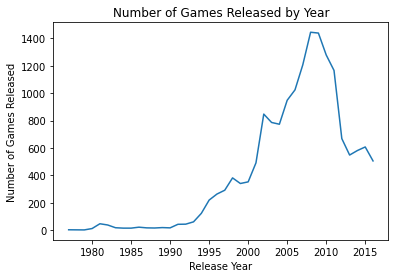

In [124]:
data.groupby(['year_of_release'])['name'].count().plot().set_title('Number of Games Released by Year')
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released");

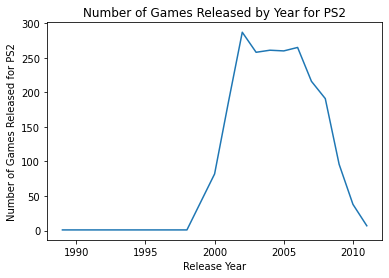

In [125]:
data.loc[data['platform'] == 'ps2'].groupby(['year_of_release'])['name'].count().plot().set_title('Number of Games Released by Year for PS2')
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released for PS2");

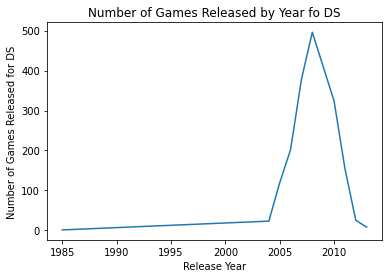

In [126]:
data.loc[data['platform'] == 'ds'].groupby(['year_of_release'])['name'].count().plot().set_title('Number of Games Released by Year fo DS')
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released for DS");

- from the plot above it is clear that the 'Number of Games Released' was alot less in the 80s and early 90s and started to rise in the mid 90s around 1995 and we can only assume that this is due to the advancement made in the technology in the 90s and the fast spread of computed machine (PC or console platforms) which lead to the increase in game development. 
- 'Number of Games Released'started to rise in a consistent pattern starting from 1995 and reached the peak around 2008 and then started to decrease till 2016.
- this decrease starting 2010 can be related to the fact that both of 'PS2' and 'DS' Platforms had reached their last years and faded as both of them have the most games released according to our data

#### - Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [127]:
data_grouped_platform_sales = data.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False)
data_grouped_platform_sales

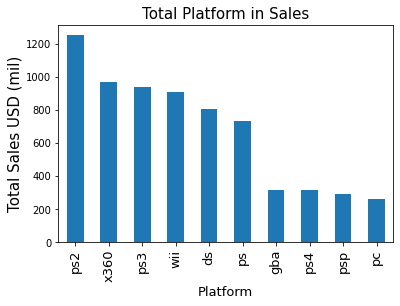

In [128]:
# lets plot the the Top 10 platforms in sales
data_grouped_platform_sales.head(10).plot(kind = 'bar').set_title('Total Platform in Sales', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

In [129]:
top_platforms = data_grouped_platform_sales.head(10).index

In [130]:

top_platforms

In [131]:
platform_sales = data.pivot_table(index = ['platform', 'year_of_release'], values='total_sales', aggfunc = 'sum')
platform_sales

In [132]:
colors = ['red', 'violet', 'olive', 'deepskyblue', 'coral', 'darkslategray',
          'mediumpurple', 'blue', 'green', 'orange', 'crimson' , 'peru', 'darkcyan', 'pink']

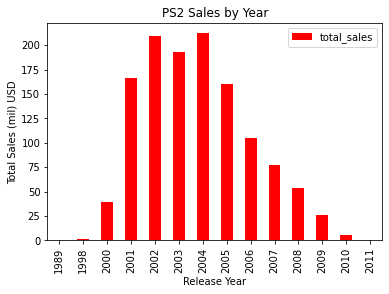

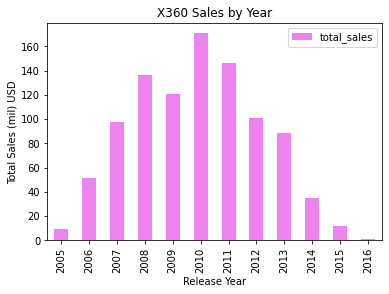

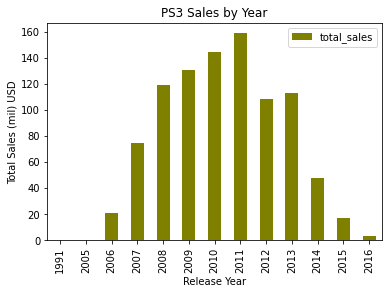

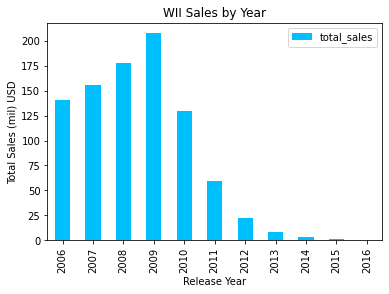

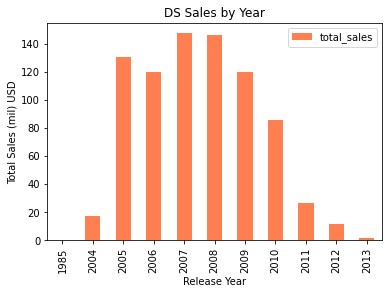

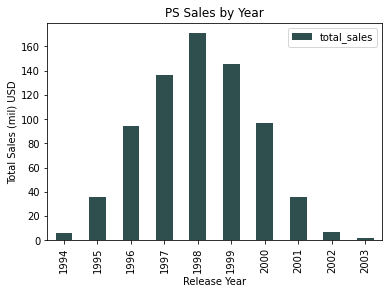

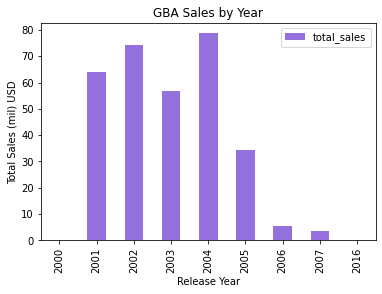

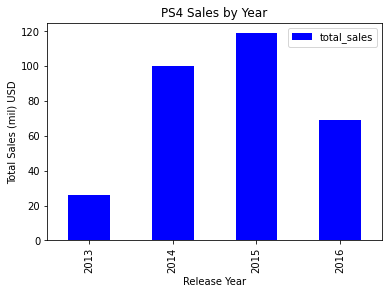

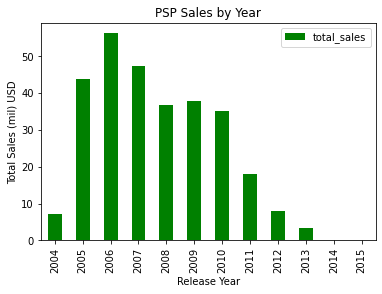

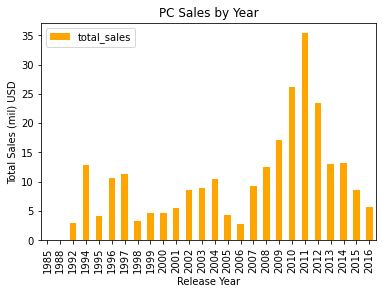

In [133]:
for i, platform in enumerate(top_platforms):
    
    platform_sales.loc[platform].plot(kind = 'bar', color = colors[i])
    plt.title(platform.upper()+' Sales by Year')
    plt.xlabel("Release Year")
    plt.ylabel("Total Sales (mil) USD");

1. based to the plots above we notice that most of the platfroms have an expectency life of around 8-10 years and peak after 3-4 years (around half way of its expected life_time) from starting with exceptions:
- 'PC' which has a long life and doesn't fade away as it is not a platform only for gaming and due to the fact that it is upgradable
- 'PS4' as it is a relatively new platform (released in 2013) so 2016-2017 should be its peak time.

3. we can notice a few odd years in our plots (2016 for 'GBA'), (1985 for 'DS'), (1991 for 'PS3'), (1989 for 'PS2'). we should discard these entries as they are wrong and probably due to errors in the dataset or in exporting the values from `ext_data`

In [134]:
data.head(3)

In [135]:
data.loc[(data['year_of_release'] == 2016)&(data['platform'] == 'gba')]

In [136]:
data.drop(data.loc[(data['year_of_release'] == 2016)&(data['platform'] == 'gba')].index , inplace = True)

In [137]:
data.loc[(data['year_of_release'] == 1985)&(data['platform'] == 'ds')]

In [138]:
data.drop(data.loc[(data['year_of_release'] == 1985)&(data['platform'] == 'ds')].index, inplace = True)

In [139]:
data.loc[(data['year_of_release'] == 1991)&(data['platform'] == 'ps3')]

In [140]:
data.drop(data.loc[(data['year_of_release'] == 1991)&(data['platform'] == 'ps3')].index,  inplace = True)

In [141]:
data.loc[(data['year_of_release'] == 1989)&(data['platform'] == 'ps2')]

In [142]:
data.drop(data.loc[(data['year_of_release'] == 1989)&(data['platform'] == 'ps2')].index,inplace = True)

In [143]:
#data.drop([12970, 15957, 4127, 8364], inplace = True)

#### - Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

as we want the successful games then we need to focus in our study on the platforms that are in their peak or almost reaching their peak and according our previous notes most platforms usually reach the peak in about 5 years therefore we will take the data for the last 5-6 years before the target year 2017 awhich is between 2010 and 2016 

#### - Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [144]:
data_relevant = data.loc[data['year_of_release'] > 2010]
data_relevant['year_of_release'].describe()

#### - Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [145]:
data_relevant.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False)

In [146]:
top_relevant_platforms = data_relevant.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False).head(10).index
top_relevant_platforms

In [147]:
relevant_platform_sales = data_relevant.pivot_table(index = ['platform', 'year_of_release'], values='total_sales', aggfunc = 'sum')
relevant_platform_sales.head()

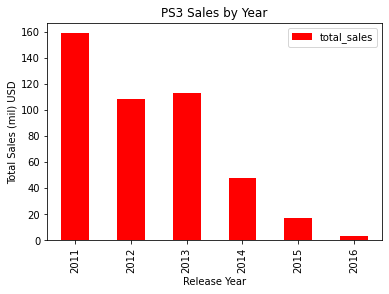

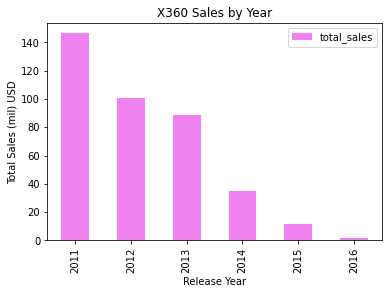

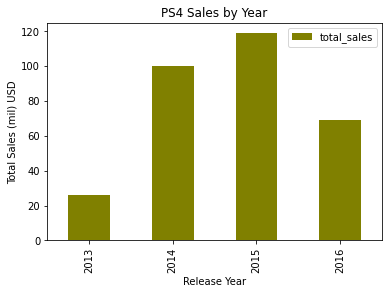

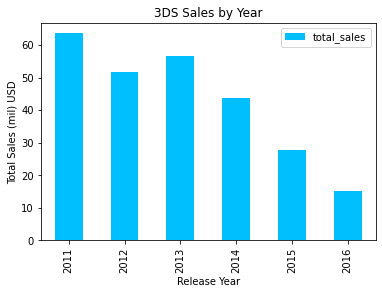

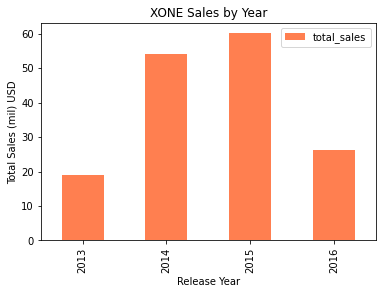

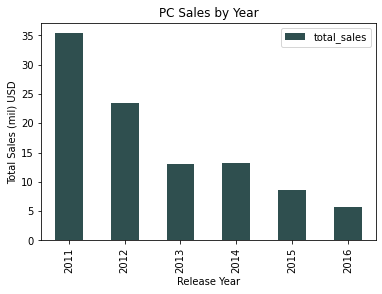

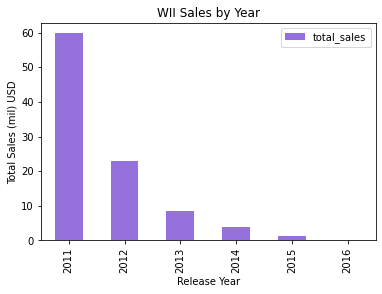

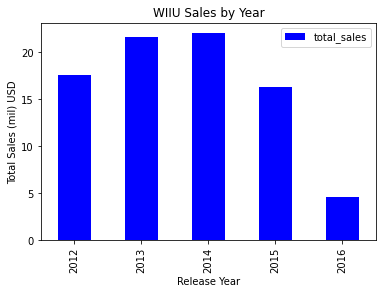

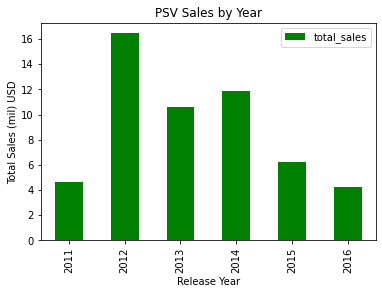

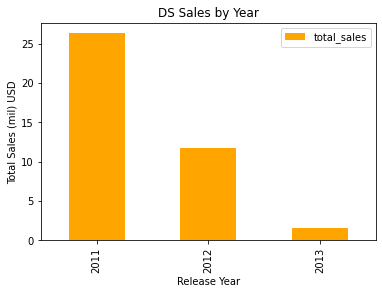

In [148]:
for i, platform in enumerate(top_relevant_platforms):
    
    relevant_platform_sales.loc[platform].plot(kind = 'bar', color = colors[i])
    plt.title(platform.upper()+' Sales by Year')
    plt.xlabel("Release Year")
    plt.ylabel("Total Sales (mil) USD");

- even though 'PS3', 'X360' and '3DS' are 3 of the top 4 platforms in sales in this time period but they are already started to fade adn the sales have decreased considerably in the last years so it is more realistic to exclude these from our potentially profitable platforms. 
- according the plots above we can see that we have 4 potential platforms that either in their peak or almost reaching the peak and these are: 'PSV', 'WII U', 'Xone' and 'PS4' and we can include 'PC' as it will not fade away for the reasons mentioned before. 

In [149]:
potential_platforms = ['psv', 'wiiu', 'xone', 'ps4', 'pc']
data_relevant_potential = data_relevant.query('platform in @potential_platforms')

In [150]:
data_relevant_potential['platform'].value_counts()

In [151]:
data_relevant_potential.head()

#### - Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

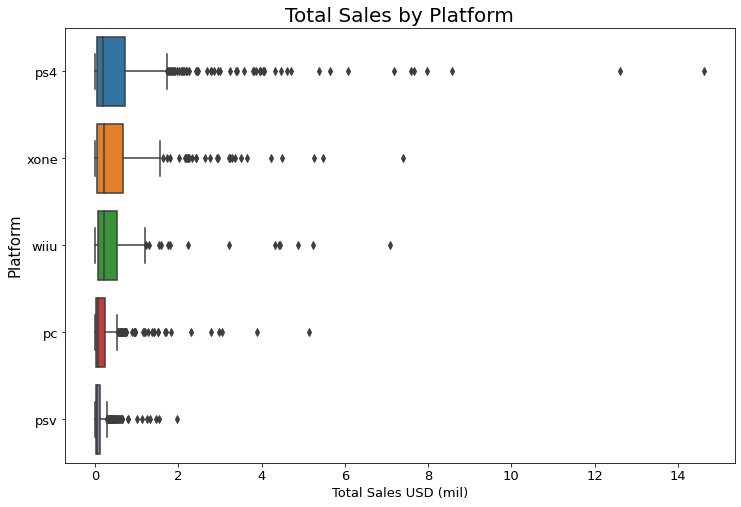

In [152]:
plt.figure(figsize=(12,8));
sns.boxplot(x="total_sales", y="platform", data=data_relevant_potential).set_title('Total Sales by Platform', fontsize=20);
plt.xlabel("Total Sales USD (mil)", fontsize= 13);
plt.ylabel("Platform", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

- the boxplots doesn't help alot as the data still has considerable amount of outliers which we will remove.
- the outliers will be removed from the data overall `total_sales` and not by platform so it will be expected to find some remaining outliers for the platforms `total_sales`

In [153]:
Q1 = data_relevant_potential['total_sales'].quantile(0.25)
Q3 = data_relevant_potential['total_sales'].quantile(0.75)
IQR = Q3 - Q1
bottom_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
if bottom_limit < 0:
    bottom_limit = 0
print('min: ',bottom_limit)
print('max: ',upper_limit)

In [154]:
data_relevant_potential_no_outliers = data_relevant_potential.query('total_sales > @bottom_limit and total_sales < @upper_limit')

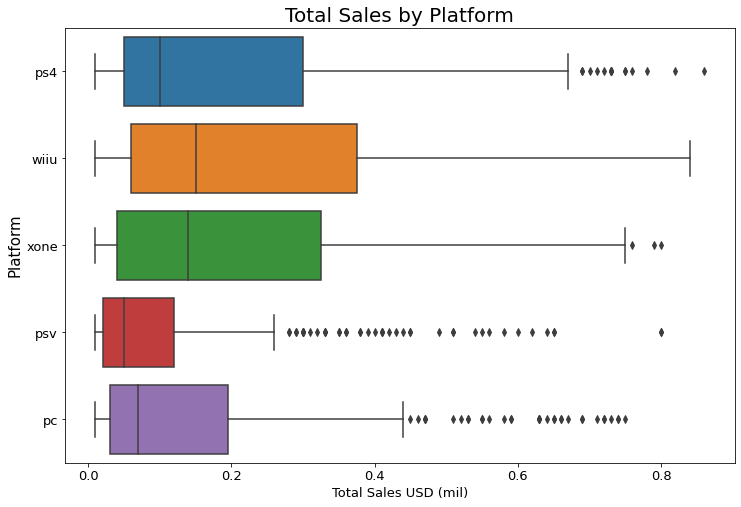

In [155]:
plt.figure(figsize=(12,8));
sns.boxplot(x="total_sales", y="platform", data=data_relevant_potential_no_outliers).set_title('Total Sales by Platform', fontsize=20);
plt.xlabel("Total Sales USD (mil)", fontsize= 13);
plt.ylabel("Platform", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

- to find out if the difference in sales is significant we will need to test the hypothesis and compare every platform to the others.
- to do so we will first splitt the dataset to several smaller ones by platform

In [156]:
ps4_data = data_relevant_potential_no_outliers.loc[data_relevant_potential_no_outliers['platform'] == 'ps4']
wiiu_data = data_relevant_potential_no_outliers.loc[data_relevant_potential_no_outliers['platform'] == 'wiiu']
xone_data = data_relevant_potential_no_outliers.loc[data_relevant_potential_no_outliers['platform'] == 'xone']
psv_data = data_relevant_potential_no_outliers.loc[data_relevant_potential_no_outliers['platform'] == 'psv']
pc_data = data_relevant_potential_no_outliers.loc[data_relevant_potential_no_outliers['platform'] == 'pc']

In [157]:
ps4_data.head(3)

In [158]:
wiiu_data.head(3)

In [159]:
xone_data.head(3)

In [160]:
psv_data.head(3)

In [161]:
pc_data.head(3)

now will test the if the in sales is significant. 

- our null hypothesis 'H0': will be that the there is no difference (the sales are equal)
- our Alt hypothesis 'H1': will be that the there is a significant difference 

we will use a standard critical statistical significance level (alpha= 0.05)

In [162]:
alpha = 0.05
ps4_sales = ps4_data['total_sales']
wiiu_sales = wiiu_data['total_sales']
xone_sales = xone_data['total_sales']
psv_sales = psv_data['total_sales']
pc_sales = pc_data['total_sales']

paramaters = [ps4_sales, wiiu_sales, xone_sales, psv_sales, pc_sales]
strings = ['PS4_sales', 'WIIu_sales', 'XONE_sales', 'PSV_sales', 'PC_sales']

for i, parameter_1 in enumerate(paramaters):
    for j, parameter_2 in enumerate(paramaters):
        if j > i:
            results_hyp = st.ttest_ind(parameter_1, parameter_2)
            print(f'{strings[i]} vs {strings[j]}')
            print('p_value =' ,results_hyp.pvalue)

            if (results_hyp.pvalue < alpha):
                print('Difference is significant')
            else:
                print("Difference is not significant")
            
            print()

after testing on all possible pairs we find that in mos of the cases we ahve enough reason to reject the null hypothesis which indicates that we can say that the difference in sales are mostly significant.

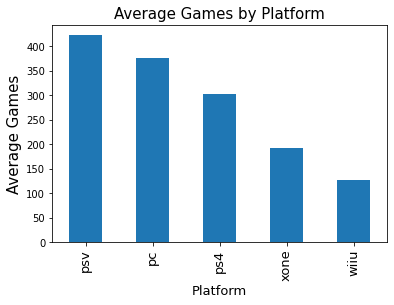

In [163]:
data_relevant_potential_no_outliers.groupby('platform')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Games by Platform', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Average Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

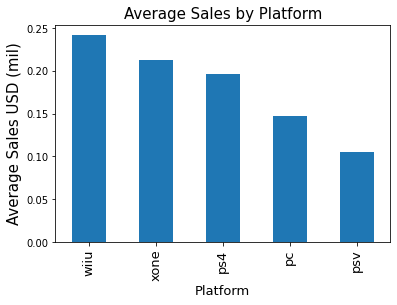

In [164]:
data_relevant_potential_no_outliers.groupby('platform')['total_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Platform', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

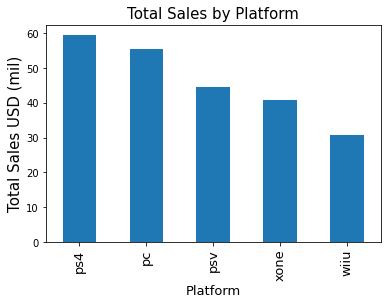

In [165]:
data_relevant_potential_no_outliers.groupby('platform')['total_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Platform', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- from the first 2 plot we can notice an interesting fact. the more the platform has games the lower the average sales for the game on that platform is and vice versa the less game it has the higher the average sales. 
- we can see that 'wiiu' are on takes the lead in the average sales per game and 'xone' comes in second and 'ps4' third.
- total sales tells us something different, in fact 'ps4' has the highest total sales and 'xone' and 'wiiu' comes in the lase 2 places and this finding can be traced back to the fact that they have the lease number of games even though the average sales are higher but maybe the difference is not enough to place them in the lead in total sales.

#### - Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [166]:
ps4_data.head()

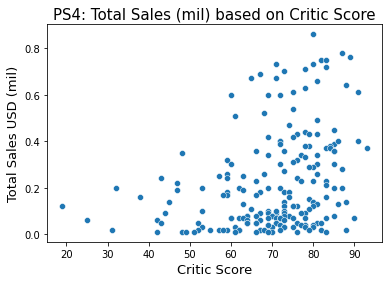

In [167]:
sns.scatterplot(data=ps4_data, x="critic_score", y="total_sales") \
   .set_title('PS4: Total Sales (mil) based on Critic Score', fontsize = 15)
plt.xlabel("Critic Score", fontsize = 13);
plt.ylabel("Total Sales USD (mil)", fontsize = 13);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

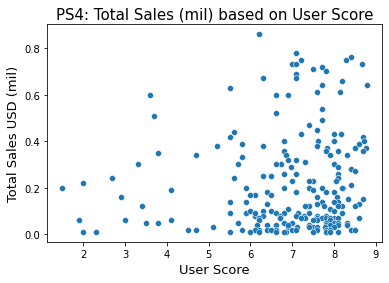

In [168]:
sns.scatterplot(data=ps4_data, x="user_score", y="total_sales") \
   .set_title('PS4: Total Sales (mil) based on User Score', fontsize = 15)
plt.xlabel("User Score", fontsize = 13);
plt.ylabel("Total Sales USD (mil)", fontsize = 13);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [169]:
ps4_data.corr()

- we chose to take 'ps4' as our test platform for the user and critic reviews effect on sales as it is placed in the middle of the platform in both number of games and average sales per game.
- from both the scatterplots and the correlation table we can see that the relation between the reviews and sales are infact positive for both user and critic reviews but in the case of user reviews it is actually pretty weak that it is barely noticable.
- in the case of critic reviews the relation is stronger than the user reviews and it can be considered as a factor for the sales to a degree.

#### - Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [170]:
# find same games on different platforms
data_relevant_potential_no_outliers.head()

In [171]:
# on how many platform each game is available
platform_availability = data_relevant_potential_no_outliers.groupby('name')['platform'].nunique().sort_values(ascending = False)
platform_availability

In [172]:
# take the games that are availble on minimum 4 platforms
platform_repeats = platform_availability.loc[platform_availability.values >= 4]
platform_repeats

In [173]:
# take the games that are available on minimum 3 platforms
games_repeated = data_relevant_potential_no_outliers.query('name in @platform_repeats.index')
games_repeated.head()

In [174]:
games_repeated_sales = games_repeated.pivot_table(index = ['name', 'platform'], aggfunc='first')
games_repeated_sales.head(10)

- we created a small dataset with the games available on several platforms(4-5 platform to be exact) and we are left with a dataset that includes 13 games.
- we will now compare the sales for each game on all platforms available and see on which platform is the most common for the highest sales.

In [175]:
games_repeated_sales.reset_index(inplace = True)

In [176]:
games_repeated_sales.head(10)

In [177]:
# Loop over the rows getting the stats 
overall_dict = []
games_stats = {}
for i, row in games_repeated_sales.iterrows():

    name = row['name']
    platform = row['platform']
    sales = row['total_sales']
    if name not in games_stats:
        games_stats[name] = {}
        games_stats[name][platform] = sales
    else:
        games_stats[name][platform] = sales

# loop over stats calculating needed stuff
most_platform = []
for game in games_stats:
    max_num = 0
    max_platform = ''
    for platform in games_stats[game]:
        if games_stats[game][platform] > max_num:
            max_num = games_stats[game][platform]
            max_platform = platform
    most_platform.append(max_platform)

    print(f'Game: {game}, Top Sales is in Platform: {max_platform.upper()} = {max_num:.2f}')

# count each platfom and get just the highest one
most_common_item = max(most_platform, key = most_platform.count)
print()
# count every platform
for platform in set(most_platform):
    count = most_platform.count(platform)
    print(f'{platform.upper()} count = {count}')
print()
print('Most common Platform for highest sales: ',most_common_item.upper())

- we can see that from our 13 test games, 9 games have their highest sales on the platform 'PS4'. 
- it looks like when the games are availble on different platforms then 'PS4' is the most common to be used.
- when we take the previous conclusion about number of games and average sales per game into account then we can assume that the differnce betweeen average and total sales orderand the fact that the 'wiiu' and 'xone' are doing well on the average sales, is because of their exclusive games ( games which are availble only on 1 platform) these  games even though they are not alot but they are tipping the scale in the average sales in these platforms

#### - Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [178]:
data_relevant_potential_no_outliers.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

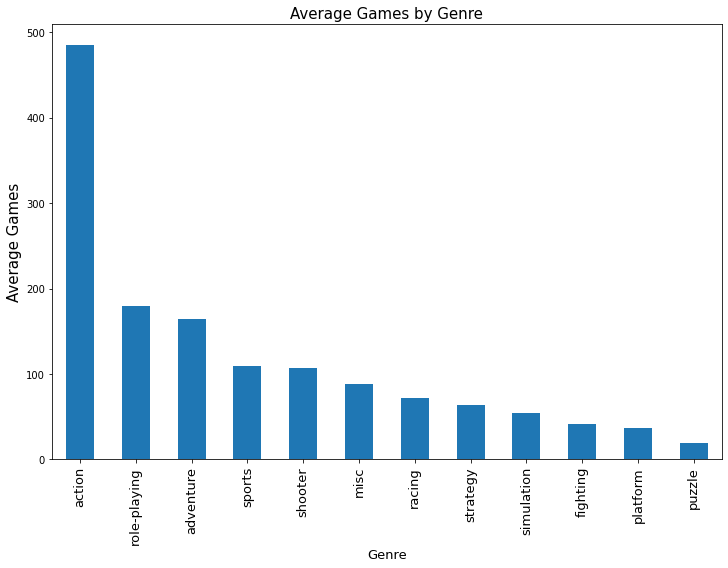

In [179]:
data_relevant_potential_no_outliers.groupby('genre')['name'].count().sort_values(ascending = False) \
                                   .plot(kind='bar', figsize=(12,8)) \
                                   .set_title('Average Games by Genre', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Average Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

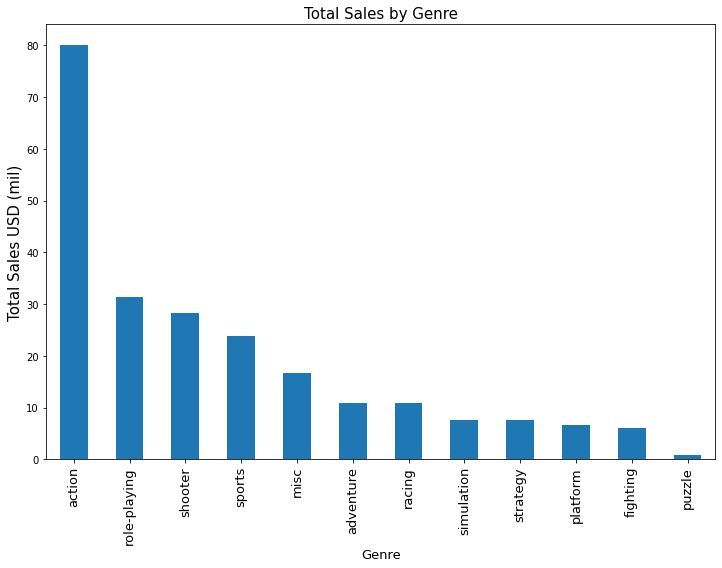

In [180]:
data_relevant_potential_no_outliers.groupby('genre')['total_sales'].sum().sort_values(ascending = False) \
                                   .plot(kind='bar', figsize=(12,8)) \
                                   .set_title('Total Sales by Genre', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

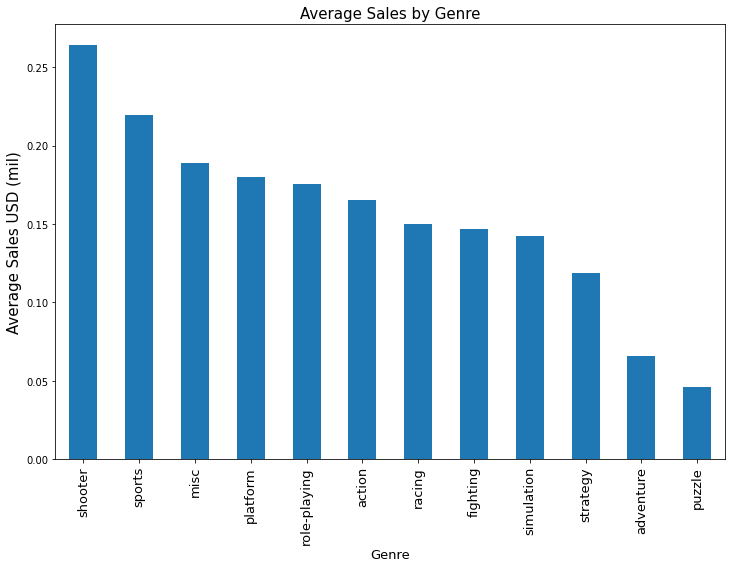

In [181]:
data_relevant_potential_no_outliers.groupby('genre')['total_sales'].mean().sort_values(ascending = False) \
                                   .plot(kind='bar', figsize=(12,8)) \
                                   .set_title('Average Sales by Genre', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

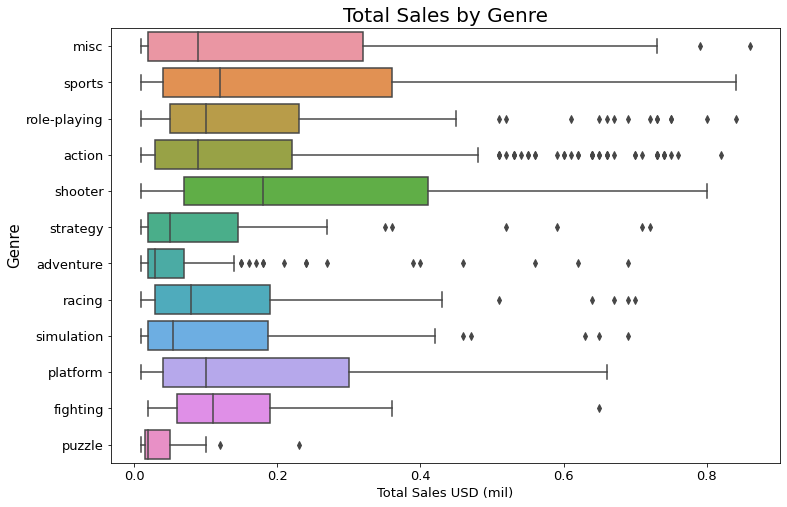

In [182]:
plt.figure(figsize=(12,8));
sns.boxplot(x="total_sales", y="genre", data=data_relevant_potential_no_outliers) \
   .set_title('Total Sales by Genre', fontsize=20);
plt.xlabel("Total Sales USD (mil)", fontsize= 13);
plt.ylabel("Genre", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 13);

- it clear that the `action` has and by far the highest number of games and highest total sales of all the genres.
- on the other hand `shooter` and `sport` games have the highest average sales per game.
- looking at the boxplot we can see that the `shooter` and `sport` have the most consistent sales and a normal distribution which makes them in my opinion a safe bet for steady sales.
- the `action` games which has the highest total sales has several high outliers which are actually affecting the average sales and still has an average in the middle of the pack of all genres and it is expected to drop even lower if we exclude these outliers which is also the case for the `role-playing` games.
- `platform` is one of the least common genres as it has second to last number of games but still came fourth in the average sales and has one of the stediest, cleanest and most consistent distributions.
- `adventure` and `puzzle` games have the lowest total and avcerage sales regardless of the number games. 

### Conclusion:

after anlayzing the data we can come to the following conclusions:

- video games industry started to grow from 1995 and reached the peak in 2008 and after that the number of games started to decrease again and this can be an after affect of the PS2 plattform fading as it was one of the most popular platforms.
- usualy it takes the platform 8-10 years to fade and it reaches its peak after 4-5 years.
- we chose to look at the data from 2010 as it is the most relevant based on the previous conclusion as we need to the focus on the platform in there prime time and the most resent trends.
- the platform with the most potential for profit are: 'PSV', 'WII U', 'Xone' and 'PS4'
- the platform with the highest total Sales is PS4.
- even though there is positive relation between user reviews and sales but it very weak and we can ignore it but on the other hand the effect of critic reviews is more obvious and we should try to accomodate to it in our work.
- Best Genre: Shooter , Sports, Platform
- Good Genre: Action, Role-Playing
- Genres we should avoid: Adventure, Puzzle

## Step 4. Create a user profile for each region <a class="anchor" id="step4"></a>

- we will work here with the dataset `data_relevant` which consists of the entries starting from the year 2010 which we determined that they are enough for our study
- we will first extract from our `data_relevant` dataset the games that are relevant for each region by applying the condtion that the sales for that region should be higher than 0.
- we will create 3 datasets, one for each region, get rid of the outliers for each dataset then we will start our comparision.

In [183]:
data_relevant

In [184]:
na_data = data_relevant.query('na_sales > 0')

In [185]:
na_data = na_data.drop(columns = ['jp_sales', 'eu_sales', 'other_sales', 'total_sales'])

In [186]:
na_data

In [187]:
Q1 = na_data['na_sales'].quantile(0.25)
Q3 = na_data['na_sales'].quantile(0.75)
IQR = Q3 - Q1
bottom_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
if bottom_limit < 0:
    bottom_limit = 0
print('min: ',bottom_limit)
print('max: ',upper_limit)

In [188]:
na_data_no_outliers = na_data.query('na_sales > @bottom_limit and na_sales < @upper_limit')

In [189]:
na_data_no_outliers

In [190]:
eu_data = data_relevant.query('eu_sales > 0')

In [191]:
eu_data = eu_data.drop(columns = ['na_sales', 'jp_sales', 'other_sales', 'total_sales'])

In [192]:
eu_data

In [193]:
Q1 = eu_data['eu_sales'].quantile(0.25)
Q3 = eu_data['eu_sales'].quantile(0.75)
IQR = Q3 - Q1
bottom_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
if bottom_limit < 0:
    bottom_limit = 0
print('min: ',bottom_limit)
print('max: ',upper_limit)

In [194]:
eu_data_no_outliers = eu_data.query('eu_sales > @bottom_limit and eu_sales < @upper_limit')

In [195]:
eu_data_no_outliers

In [196]:
japan_data = data_relevant.query('jp_sales > 0')

In [197]:
japan_data = japan_data.drop(columns = ['na_sales', 'eu_sales', 'other_sales', 'total_sales'])

In [198]:
japan_data

In [199]:
Q1 = japan_data['jp_sales'].quantile(0.25)
Q3 = japan_data['jp_sales'].quantile(0.75)
IQR = Q3 - Q1
bottom_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
if bottom_limit < 0:
    bottom_limit = 0
print('min: ',bottom_limit)
print('max: ',upper_limit)

In [200]:
japan_data_no_outliers = japan_data.query('jp_sales > @bottom_limit and jp_sales < @upper_limit')

In [201]:
japan_data_no_outliers

In [202]:
NA_total_Sales = na_data_no_outliers['na_sales'].sum()
print('Total Sales in NA USD(mil): {:.2f}'.format(NA_total_Sales))

In [203]:
EU_total_Sales = eu_data_no_outliers['eu_sales'].sum()
print('Total Sales in EU USD(mil): {:.2f}'.format(EU_total_Sales))

In [204]:
JP_total_Sales = japan_data_no_outliers['jp_sales'].sum()
print('Total Sales in JP USD(mil): {:.2f}'.format(JP_total_Sales))

- we can see that the NA Market is the biggest and then comes EU and lastly comes Japan which is a pretty small Market in comparison to them other 2.

- now lets start our comarision and we will start first with the top platforms in every region

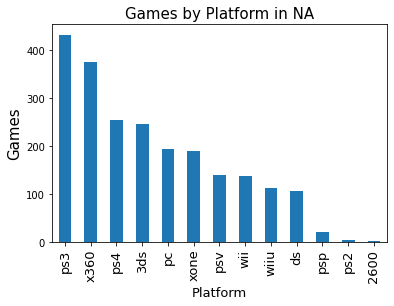

In [205]:
na_data_no_outliers.groupby('platform')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by Platform in NA', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

In [206]:
na_data_no_outliers.loc[na_data_no_outliers['platform'] == '2600']

In [207]:
na_data_no_outliers = na_data_no_outliers.drop(index = 4220)

In [208]:
na_data_no_outliers.loc[na_data['platform'] == '2600']

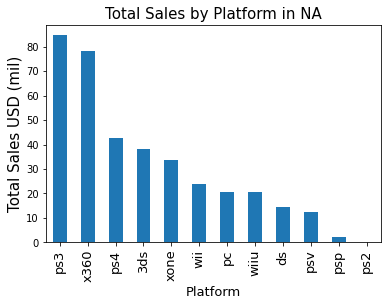

In [209]:
na_data_no_outliers.groupby('platform')['na_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Platform in NA', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

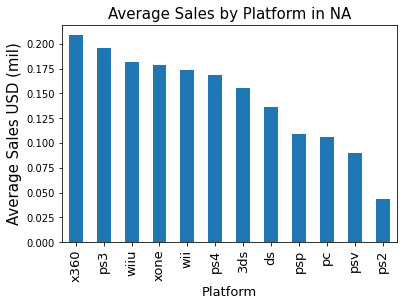

In [210]:
na_data_no_outliers.groupby('platform')['na_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Platform in NA', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

In [211]:
Sales_NA = na_data_no_outliers.groupby('platform')['na_sales'].sum() 
Sales_NA

In [212]:
Sales_NA / Sales_NA.sum()

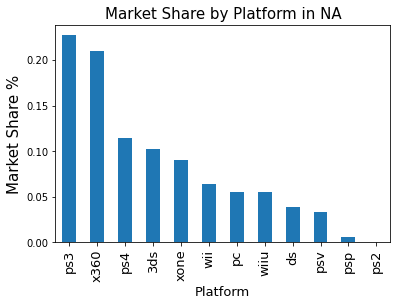

In [213]:
(Sales_NA / Sales_NA.sum()).sort_values(ascending = False).plot(kind='bar') \
                         .set_title('Market Share by Platform in NA', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Market Share %", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- based on the total sales we can see that the top 5 platform in NA are ( 'PS3', 'X360', 'PS4', '3DS', 'Xone')
- if we condiser the average sales per game then we notice that the 'Wii' and 'WiiU' are strong contenders and they entered the top 5 instead 'PS4' and '3DS'
- as concluded before the fact that are 'Wii' and 'WiiU' are doing great in average salse per game is probalby because of their exclusives which are few but popular.
- it is obviuos the most common and popular platforms are and by far 'X360' and 'PS3' 
- we can see that in NA the Xbox series is slightly more popular and is doing abit better than the Playstation Series
- in the NA we can see that the Home Platforms are more common and popular than the portable ones.

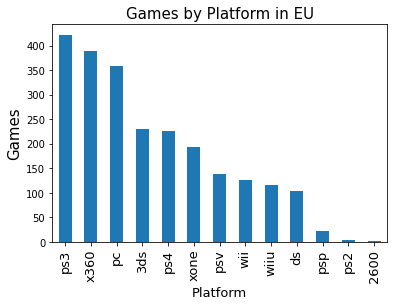

In [214]:
eu_data_no_outliers.groupby('platform')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by Platform in EU', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

In [215]:
eu_data_no_outliers.loc[eu_data_no_outliers['platform'] == '2600']

In [216]:
eu_data_no_outliers = eu_data_no_outliers.drop(index = 4220)

In [217]:
eu_data_no_outliers.loc[eu_data_no_outliers['platform'] == '2600']

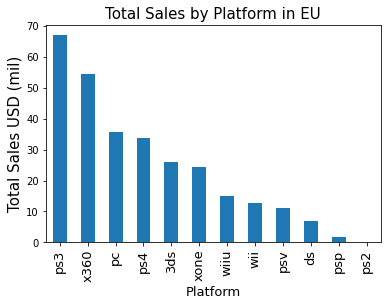

In [218]:
eu_data_no_outliers.groupby('platform')['eu_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Platform in EU', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

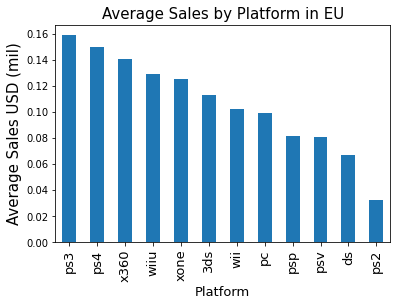

In [219]:
eu_data_no_outliers.groupby('platform')['eu_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Platform in EU', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

In [220]:
Sales_EU = eu_data_no_outliers.groupby('platform')['eu_sales'].sum() 
Sales_EU

In [221]:
Sales_EU / Sales_EU.sum()

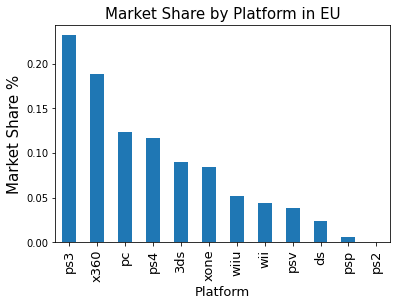

In [222]:
(Sales_EU / Sales_EU.sum()).sort_values(ascending = False).plot(kind='bar') \
                         .set_title('Market Share by Platform in EU', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Market Share %", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- based on the total sales we can see that the top 5 platform in EU are ( 'PS3', 'X360', 'PC', 'PS4', '3DS') and 'Xone' with a very close sales to the '3DS'
- if we condiser the average sales per game then we notice that the 'WiiU' and 'Xone' are strong contenders and they entered the top 5 instead '3DS' and 'PC'
- we can see that the 'PC' has droped from 3rd in total sales to 8th in average sales
- as concluded before the fact that are 'Wii' and 'WiiU' are doing great in average salse per game is probalby because of their exclusives which are few but popular which can apply here in EU also
- it is obviuos that also in EU the most common and popular platforms are also 'X360' and 'PS3' but the new genaerations of both are doing better than in NA 
- we can see that in EU the Playstation series is slightly more popular and is doing better than in NA where Xbox Series is slightly more popular.
- in the EU we can also see, like in NA, that the Home Platforms are more common and popular than the portable ones.

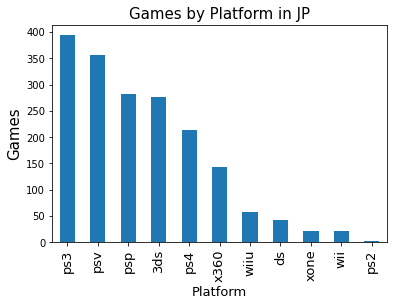

In [223]:
japan_data_no_outliers.groupby('platform')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by Platform in JP', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

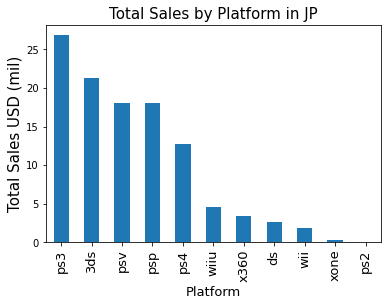

In [224]:
japan_data_no_outliers.groupby('platform')['jp_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Platform in JP', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

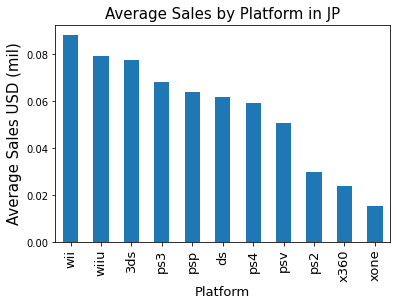

In [225]:
japan_data_no_outliers.groupby('platform')['jp_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Platform in JP', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

In [226]:
Sales_JP = japan_data_no_outliers.groupby('platform')['jp_sales'].sum() 
Sales_JP

In [227]:
Sales_JP / Sales_JP.sum()

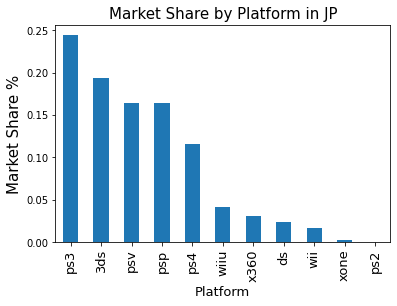

In [228]:
(Sales_JP / Sales_JP.sum()).sort_values(ascending = False).plot(kind='bar') \
                         .set_title('Market Share by Platform in JP', fontsize=15);
plt.xlabel("Platform", fontsize= 13);
plt.ylabel("Market Share %", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- based on the total sales we can see that the top 5 platform in JP are ( 'PS3', '3DS', 'PSV', 'PSP', 'PS4')
- if we condiser the average sales per game then we notice that the 'Wii' and 'WiiU' are topping the scales and taking the lead.
- as concluded before the fact that are 'Wii' and 'WiiU' are doing great in average salse per game is probalby because of their exclusives which are few but popular which can apply here in JP also
- in JP also  PS3' is one the most common and popular platforms.
- in JP we can notice the least Poplular is the Xbox Series as it has the least average sales and very low total sales
- it noticable that in JP the portable platform are very popular and doing great saleswise wether the PS or Nintendo series

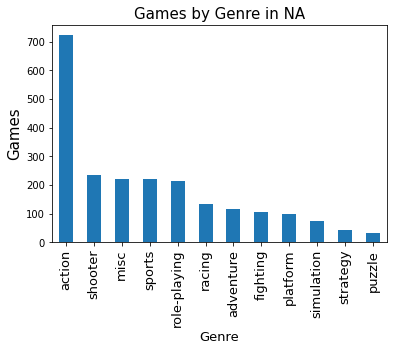

In [229]:
na_data_no_outliers.groupby('genre')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by Genre in NA', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

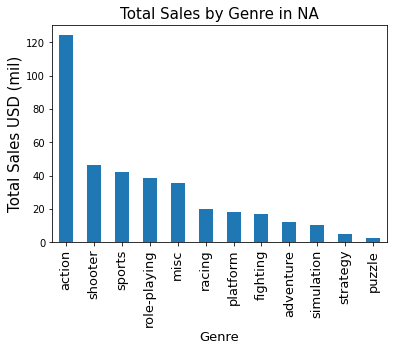

In [230]:
na_data_no_outliers.groupby('genre')['na_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Genre in NA', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

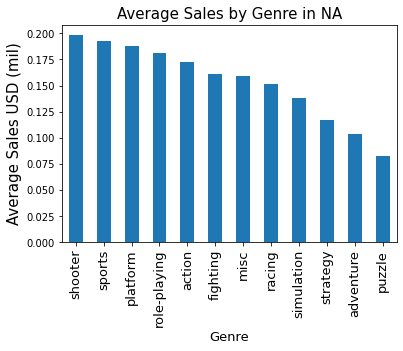

In [231]:
na_data_no_outliers.groupby('genre')['na_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Genre in NA', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- we can see that the NA Market follows the same trends just like in the global market
- based on both the total sales and average sales we can conclude that the top 5 Genres in NA are ('Shooter', 'Sports, 'Role-Playing', 'Action', 'Platform') 
- We opted to exclude 'misc' from the Top Genres as it is not a clearly defined Genre.
- even though the 'racing' came above 'Platform' in total sales but the difference is slim and barely noticable so we opted for the 'platform' which is third in the average sales. 

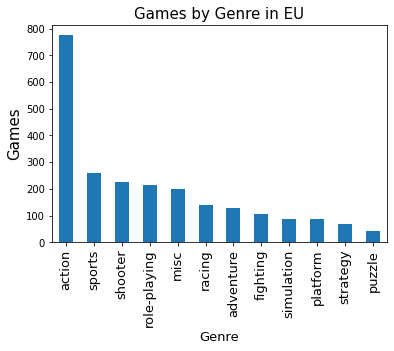

In [232]:
eu_data_no_outliers.groupby('genre')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by Genre in EU', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

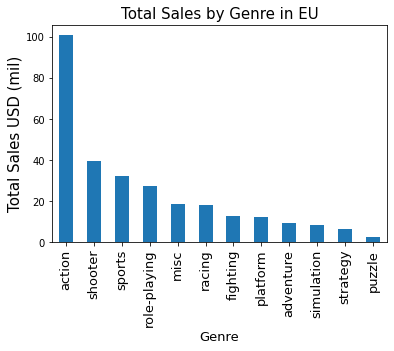

In [233]:
eu_data_no_outliers.groupby('genre')['eu_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Genre in EU', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

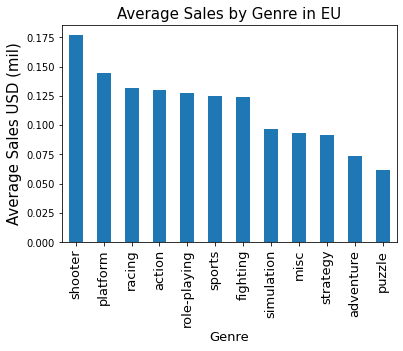

In [234]:
eu_data_no_outliers.groupby('genre')['eu_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Genre in EU', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- Just like NA, the Eu Market also follows the same trends as the global market
- based on both the total sales and average sales we can conclude that the top 5 Genres in EU are also ('Shooter', 'Sports, 'Role-Playing', 'Action', 'Platform') with 'Racing' as a strong contender with very close sales.
- We opted to exclude 'misc' from the Top Genres as it is not a clearly definde Genre.
- 'racing' had a slightly higher total sales than 'Platform' while the average sales of 'platform' is slightly better so we opted for the 'platform' as we consider the consistency of sales are more important.
- in Top Genres in EU are quite similar to those in NA

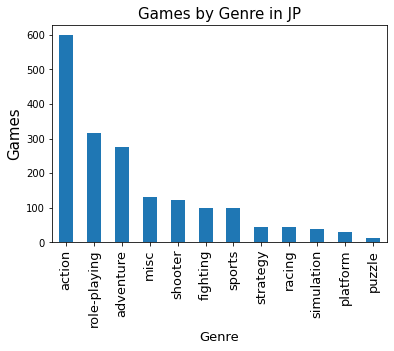

In [235]:
japan_data_no_outliers.groupby('genre')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by Genre in JP', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

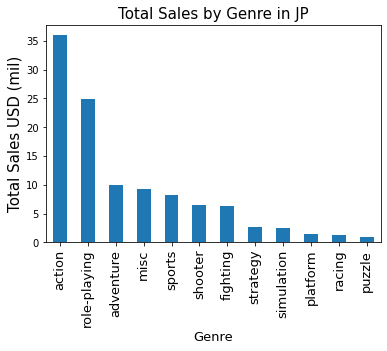

In [236]:
japan_data_no_outliers.groupby('genre')['jp_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by Genre in JP', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

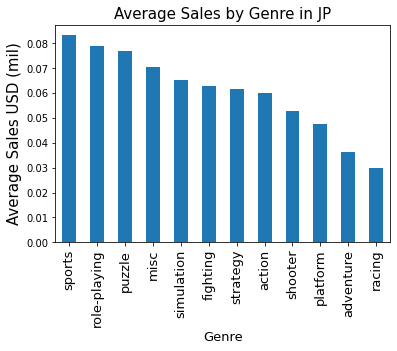

In [237]:
japan_data_no_outliers.groupby('genre')['jp_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by Genre in JP', fontsize=15);
plt.xlabel("Genre", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- in  JP the popular Genres is quite different than those in EU and NA, here even though we still have 'action' as the highest total sales but after that we have 'Role-Playing', 'Adventure', 'Sports' and 'fighting' as the next Genres in the Top 5 based on both Average and total sales together.
- in JP we see that 'Role-Playing' is way more popular than in NA and EU.
- here also We opted to exclude 'misc' from the Top Genres as it is not a clearly definde Genre.
- we notice that 2 new Genres are in the Top 5 which are 'Adventure' and 'fighting' while 'Shooter' and 'platform' are not in the Top 5 anymore.

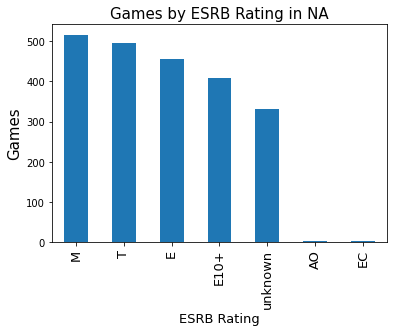

In [238]:
na_data_no_outliers.groupby('rating')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by ESRB Rating in NA', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

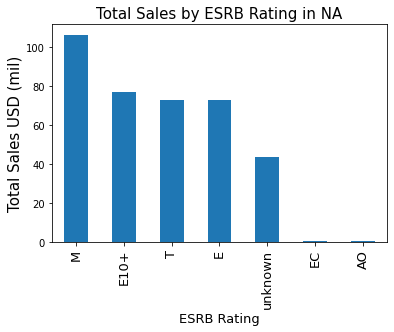

In [239]:
na_data_no_outliers.groupby('rating')['na_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by ESRB Rating in NA', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

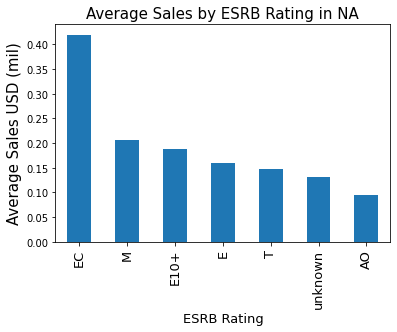

In [240]:
na_data_no_outliers.groupby('rating')['na_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by ESRB Rating in NA', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- we will opt to ignore games with 'EC' as there are only a few of them and can't decide based on this low number.
- we notice that the Games with 'M' Rating have the highest sales in both total and average sales after ignoring 'EC' 
- the sales for the games with all other rating are almost identical.
- in NA we can say that other than Mature games the ESRB rating has no effect on sales.

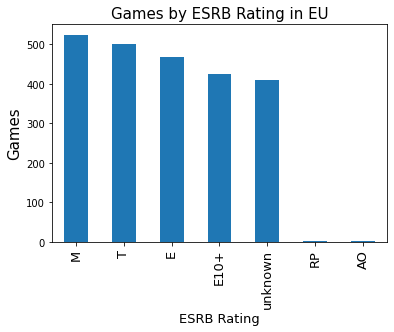

In [241]:
eu_data_no_outliers.groupby('rating')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by ESRB Rating in EU', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

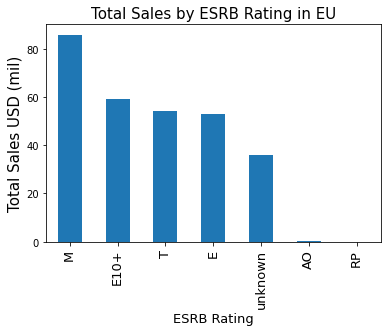

In [242]:
eu_data_no_outliers.groupby('rating')['eu_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by ESRB Rating in EU', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

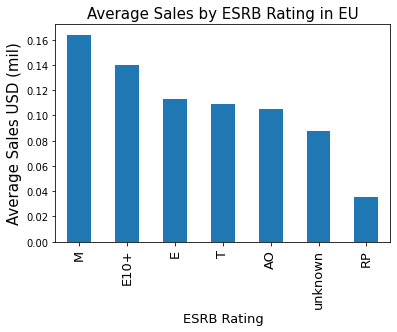

In [243]:
eu_data_no_outliers.groupby('rating')['eu_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by ESRB Rating in EU', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- just like in NA we notice that the Games with 'M' Rating have the highest sales in both total and average sales
- the sales for the games with all other rating are almost identical with a slightly better sales for the E10+ in average.
- also in EU we can say that other than Mature games the ESRB rating has no great effect on sales.

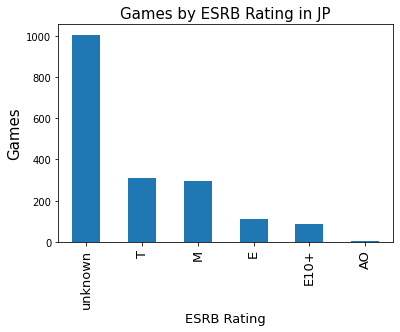

In [244]:
japan_data_no_outliers.groupby('rating')['name'].count() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Games by ESRB Rating in JP', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Games", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

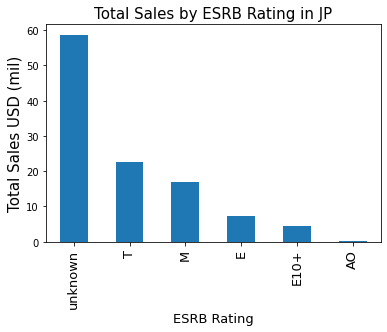

In [245]:
japan_data_no_outliers.groupby('rating')['jp_sales'].sum() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Total Sales by ESRB Rating in JP', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Total Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

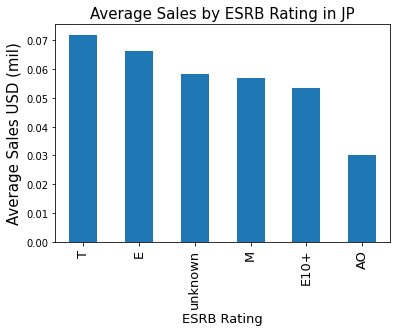

In [246]:
japan_data_no_outliers.groupby('rating')['jp_sales'].mean() \
                                   .sort_values(ascending = False).plot(kind='bar') \
                                   .set_title('Average Sales by ESRB Rating in JP', fontsize=15);
plt.xlabel("ESRB Rating", fontsize= 13);
plt.ylabel("Average Sales USD (mil)", fontsize= 15);
plt.xticks(fontsize = 13);
plt.yticks(fontsize = 10);

- In JP we notice that the highest top sales are for games with 'unknown' ESRB Rating ( maybe they don't have ratings because the ESRB rating system is mandatory only in NA)
- in total sales the difference between the highest 'unknown' and the rest is big  and after that come 'T' and 'M'
- average sales there is no noticable difference between different ratings. 
- we can say that the ESRB ratings have no effect on sales in JP.

### Conclusions:

#### User Profiles: 

**NA:** 
- Top Platforms: ( 'PS3', 'X360', 'PS4', '3DS', 'Xone'), but we can't ignore 'Wii' and 'WiiU' as they have a consistent average sales per game.
- Market Share is dominated by PS3 and X360 with around 21-22% Share for Each of them
- Top Genres: ('Shooter', 'Sports, 'Role-Playing', 'Action', 'Platform')
- ESRB Rating: Other than 'M' nothing realy affects the sales of the games.

**EU:** 
- Top Platforms: ( 'PS3', 'X360', 'PC', 'PS4', '3DS'), but we can't ignore 'Xone' and 'WiiU' as they have a consistent average sales per game and coming strong after.
- PS3 takes the lead in Marketshare with around 23% of the market and X360 comes second with 18%
- Top Genres: ('Shooter', 'Sports, 'Role-Playing', 'Action', 'Platform')
- ESRB Rating: Other than 'M' nothing realy affects the sales of the games.

**JP:** 
- Top Platforms: ( 'PS3', '3DS', 'PSV', 'PSP', 'PS4'), but we can't ignore 'Wii' and 'WiiU' as they have a consistent average sales per game.
- Market Share is dominated by PS3 with around 24% and then comes the portable platforms ('3DS', 'PSV', 'PSP') with 16-18% each
- Top Genres: ('Role-Playing', 'Adventure', 'Sports' and 'fighting', 'action')
- ESRB Rating: doesn't have an affect on sales at it is not an official rating system in JAPAN.


## Step 5. Test the following hypotheses:  <a class="anchor" id="step5"></a>

### Average user ratings of the Xbox One and PC platforms are the same.

- for this we will use data from the `data_relevant`dataset.
- we will create 2 dataset one for 'Xone' and the other for 'PC'

In [247]:
data_relevant.head()

In [248]:
xone_data = data_relevant.query(" platform == 'xone' ")
xone_data.head()

In [249]:
pc_data = data_relevant.query(" platform == 'pc' ")
pc_data.head()

in this test we will be testing the following hypothesis:
- H0: average user rating for (xone) == average user rating for (PC)
- H1: average user rating for (xone) != average user rating for (PC)

we will use a critical statistical significance level (alpha= 0.02) as we want to chack if they are equal so the diefference should be minimized as much as possible

In [250]:
alpha = 0.02


results = st.ttest_ind(xone_data['user_score'], pc_data['user_score'], nan_policy='omit')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis and the rating are not the same")
else:
        print("We can't reject the null hypothesis therfore we can say that the ratings are the same") 

as we can see from the test above we don't have enough reason to reject the Null hypothesis therefore it is valid to say that the average user ratings of the Xbox One and PC platforms are the same

### —Average user ratings for the Action and Sports genres are different.


- for this we will use data from the `data_relevant`dataset.
- we will create 2 dataset one for 'Action' and the other for 'Sports'

In [251]:
data_relevant.head()

In [252]:
action_data = data_relevant.query(" genre == 'action' ")
action_data.head()

In [253]:
sports_data = data_relevant.query(" genre == 'sports' ")
sports_data.head()

in this test we will be testing the following hypothesis:
- H0: average user rating for (Action) == average user rating for (sports)
- H1: average user rating for (Action) != average user rating for (sports)

we will also use a critical statistical significance level (alpha= 0.05)

In [254]:
alpha = 0.02

results = st.ttest_ind(action_data['user_score'], sports_data['user_score'], nan_policy='omit')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis and the ratings are different")
else:
        print("We can't reject the null hypothesis therfore we can't say that the ratings different") 

in the case of the average user ratings between 'action' and 'sports' genre we found enough reason to reject the null hypothesis that the ratings are equal therefore we can say that the ratings are different.

## Step 6. General Conclusion <a class="anchor" id="step6"></a>

in this project we have analyzed data about video games trying to determine what sort of games have the highest chance to sell in the year of 2017 and in the end we came to the conclusion that we need to focus on the following:

1. which market are we targeting: 

    **- NA and EU follow almost the same Trends and have similar taste:**
        a. Platform: the platform with the most potential to have a big winner game is PS4 as it is the newer generation of PS3 which is dominating the market, and as we are reaching the peak years of PS4 and the theoretical end of PS3 life then it is more logical to focus on PS4.we can't ignore the Xone or the Wii series but they don't have the same potential as PS4
        b. Genres: Shooter Games are the most popular in NA and EU and have the highest average sales so they are always a safe bet and so is sports and Platform games, but we can't ignore action and Role-Playing Games as they have the highest outliers and we might hit a winner but they are more dangerous to invest in.
        c. ESRB Rating doen't have a noticable effect on sales but we should try to focus on Games with 'M' rating as they have the highest sales.
     
     **- Japan: the Japan Market have its unique taste and Trends:**
         a. Platform: the most used platforms are the portable ones so we should focus on those and specificaly 3DS
         b. Genres: the most consistent Games in Sales which have the highest average sales are Role Playing and Sports Games so they are the most obvious choice but we can try some Adventure Games as they have their Market.
         c. ESRB Rating doesn't have an affect on sales at it is not an official rating system in JAPAN.
         
2. User reviews doesn't have an affect but we should try to incorporate the critic reviews in our advertisements as they have a bigger impact on sales.


3. We should consider into our strategy the size of the Market in the last 6 years: 
    - NA with 370 mil USD total sales
    - EU with 290 mil USD total sales
    - JP with 110 mil USD total sales
